# Prédiction de l'obtention d'un permis avec un réseau de neurones artificiel

### 1. Nettoyage du dataset

In [111]:
# Importation des librairies

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Importtion du dataset

df_permit = pd.read_csv('dataset/dataset_issued.csv')

# Suppression des catégories inutiles

df_permit = df_permit.drop(['Permit Number'],axis=1)
df_permit = df_permit.drop(['Block'],axis=1)
df_permit = df_permit.drop(['Lot'],axis=1)
df_permit = df_permit.drop(['Street Number'],axis=1)
df_permit = df_permit.drop(['Street Number Suffix'],axis=1)
df_permit = df_permit.drop(['Unit'],axis=1)
df_permit = df_permit.drop(['Unit Suffix'],axis=1)
df_permit = df_permit.drop(['Description'],axis=1)
df_permit = df_permit.drop(['Permit Expiration Date'],axis=1)
df_permit = df_permit.drop(['Estimated Cost'],axis=1)
df_permit = df_permit.drop(['Existing Use'],axis=1)
df_permit = df_permit.drop(['Existing Units'],axis=1)
df_permit = df_permit.drop(['Plansets'],axis=1)
df_permit = df_permit.drop(['Location'],axis=1)
df_permit = df_permit.drop(['Record ID'],axis=1)
df_permit = df_permit.drop(['Filed Date'],axis=1)

#Remplacement des données manquantes avec des zéros (voir paramètre du fillna)

df_permit['Number of Existing Stories'] = df_permit['Number of Existing Stories'].fillna(0)
df_permit['Number of Proposed Stories'] = df_permit['Number of Proposed Stories'].fillna(0)
df_permit['Structural Notification'] = df_permit['Structural Notification'].fillna(0)
df_permit['Voluntary Soft-Story Retrofit'] = df_permit['Voluntary Soft-Story Retrofit'].fillna(0)
df_permit['Fire Only Permit'] = df_permit['Fire Only Permit'].fillna(0)
df_permit['TIDF Compliance'] = df_permit['TIDF Compliance'].fillna(0)
df_permit['Site Permit'] = df_permit['Site Permit'].fillna(0)
df_permit['Street Suffix'] = df_permit['Street Suffix'].fillna(0)
df_permit['Existing Construction Type'] = df_permit['Existing Construction Type'].fillna(0)
df_permit['Proposed Construction Type'] = df_permit['Proposed Construction Type'].fillna(0)
df_permit['Existing Construction Type Description'] = df_permit['Existing Construction Type Description'].fillna(0)
df_permit['Proposed Construction Type Description'] = df_permit['Proposed Construction Type Description'].fillna(0)
df_permit['Proposed Use'] = df_permit['Proposed Use'].fillna(0)

#Remplacement des données manquantes avec la médiane (voir paramètre du fillna)

df_permit['Revised Cost'] = df_permit['Revised Cost'].fillna(np.nanmedian(df_permit['Revised Cost']))
df_permit['Proposed Units'] = df_permit['Proposed Units'].fillna(np.nanmedian(df_permit['Proposed Units']))

#Suppression des données manquantes

# df_permit = df_permit.dropna(subset=['First Construction Document Date'])
df_permit = df_permit.dropna(subset=['Neighborhoods - Analysis Boundaries'])
df_permit = df_permit.dropna(subset=['Zipcode'])
# df_permit = df_permit.dropna(subset=['Issued Date'])

df_permit['Site Permit'].value_counts()

1    182295
0     14879
Name: Site Permit, dtype: int64

In [112]:
# Modification des colonnes 'date' : 
# - Création permit date devient 0 
# - Les autres dates sont remplacées par le nombre de jour écoulé depuis la création du permis

df_date = df_permit[['Permit Creation Date','Current Status Date','Issued Date','Completed Date']]
df_date['Permit Creation Date'] = pd.to_datetime(df_date['Permit Creation Date'])
df_date['Current Status Date'] = pd.to_datetime(df_date['Current Status Date'])
df_date['Issued Date'] = pd.to_datetime(df_date['Issued Date'])
df_date['Completed Date'] = df_date['Completed Date'].fillna(np.NaN)
df_date['Completed Date'] = pd.to_datetime(df_date['Completed Date'])

df_date2=df_date
df_date2['Issued Date'] = (df_date['Issued Date'] - df_date['Permit Creation Date']).dt.days
df_date2['Current Status Date'] = (df_date2['Current Status Date'] - df_date2['Permit Creation Date']).dt.days
df_date2['Completed Date'] = (df_date2['Completed Date'] - df_date2['Permit Creation Date']).dt.days

df_date2.head(50)

,Permit Creation Date,Current Status Date,Issued Date,Completed Date
0,2015-05-06,960,187.0,NaN
1,2016-04-19,471,471.0,NaN
2,2016-05-27,487,NaN,NaN
3,2016-11-07,259,253.0,259.0
4,2016-11-28,368,368.0,NaN
5,2017-06-14,22,22.0,NaN
6,2017-06-30,12,0.0,12.0
7,2017-06-30,0,0.0,NaN
8,2017-07-05,0,0.0,NaN
9,2017-07-06,0,0.0,NaN


In [113]:
#On rajoute nos données modifiées dans le dataset initial 

a = np.array(df_date2['Completed Date'].values.tolist())
df_date2['Completed Date'] = np.where(a > 5000, 9999, a).tolist()

df_permit['Current Status Date'] = df_date2['Current Status Date']
df_permit['Issued Date'] = df_date2['Issued Date']
df_permit['Completed Date'] = df_date2['Completed Date']

df_permit.head()

,Unnamed: 0,Permit Type,Permit Type Definition,Permit Creation Date,Street Name,Street Suffix,Current Status,Current Status Date,Issued Date,Completed Date,...,Proposed Units,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode
0,0,4,sign - erect,05/06/2015,Ellis,St,expired,960,187.0,NaN,...,2.0,0,3.0,constr type 3,0.0,0,1,3.0,Tenderloin,94102.0
1,1,4,sign - erect,04/19/2016,Geary,St,issued,471,471.0,NaN,...,2.0,0,3.0,constr type 3,0.0,0,1,3.0,Tenderloin,94102.0
2,2,3,additions alterations or repairs,05/27/2016,Pacific,Av,withdrawn,487,NaN,NaN,...,39.0,0,1.0,constr type 1,1.0,constr type 1,0,3.0,Russian Hill,94109.0
3,3,8,otc alterations permit,11/07/2016,Pacific,Av,complete,259,253.0,259.0,...,1.0,0,5.0,wood frame (5),5.0,wood frame (5),1,3.0,Nob Hill,94109.0
4,4,6,demolitions,11/28/2016,Market,St,issued,368,368.0,NaN,...,2.0,0,3.0,constr type 3,0.0,0,1,6.0,Tenderloin,94102.0


In [114]:
#One hot encoder : on convertit les données de type string en integer pour les passer dans notre réseau de neurones

from sklearn.preprocessing import LabelEncoder,OneHotEncoder

labelencoder_X_1 = LabelEncoder()

df_permit_encoded = df_permit
df_permit_encoded['Permit Type Definition'] =labelencoder_X_1.fit_transform(df_permit_encoded['Permit Type Definition'])
df_permit_encoded['Street Name'] =labelencoder_X_1.fit_transform(df_permit_encoded['Street Name'])
df_permit_encoded['Street Suffix'] =labelencoder_X_1.fit_transform(df_permit_encoded['Street Suffix'].astype(str))
df_permit_encoded['Current Status'] =labelencoder_X_1.fit_transform(df_permit_encoded['Current Status'].astype(str))
df_permit_encoded['Existing Construction Type Description'] =labelencoder_X_1.fit_transform(df_permit_encoded['Existing Construction Type Description'].astype(str))
df_permit_encoded['Structural Notification'] =labelencoder_X_1.fit_transform(df_permit_encoded['Structural Notification'].astype(str))
df_permit_encoded['TIDF Compliance'] =labelencoder_X_1.fit_transform(df_permit_encoded['TIDF Compliance'].astype(str))
df_permit_encoded['Site Permit'] =labelencoder_X_1.fit_transform(df_permit_encoded['Site Permit'].astype(str))
df_permit_encoded['Neighborhoods - Analysis Boundaries'] =labelencoder_X_1.fit_transform(df_permit_encoded['Neighborhoods - Analysis Boundaries'].astype(str))
df_permit_encoded['Proposed Construction Type Description'] =labelencoder_X_1.fit_transform(df_permit_encoded['Proposed Construction Type Description'].astype(str))
df_permit_encoded['Number of Proposed Stories'] =labelencoder_X_1.fit_transform(df_permit_encoded['Number of Proposed Stories'].astype(str))
df_permit_encoded['Voluntary Soft-Story Retrofit'] =labelencoder_X_1.fit_transform(df_permit_encoded['Voluntary Soft-Story Retrofit'].astype(str))
df_permit_encoded['Fire Only Permit'] =labelencoder_X_1.fit_transform(df_permit_encoded['Fire Only Permit'].astype(str))
df_permit_encoded['Revised Cost'] =labelencoder_X_1.fit_transform(df_permit_encoded['Revised Cost'].astype(str))
df_permit_encoded['Proposed Use'] =labelencoder_X_1.fit_transform(df_permit_encoded['Proposed Use'].astype(str))
df_permit_encoded.head()

,Unnamed: 0,Permit Type,Permit Type Definition,Permit Creation Date,Street Name,Street Suffix,Current Status,Current Status Date,Issued Date,Completed Date,...,Proposed Units,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode
0,0,4,6,05/06/2015,529,17,5,960,187.0,NaN,...,2.0,0,3.0,3,0.0,0,1,3.0,35,94102.0
1,1,4,6,04/19/2016,640,17,8,471,471.0,NaN,...,2.0,0,3.0,3,0.0,0,1,3.0,35,94102.0
2,2,3,0,05/27/2016,1187,2,13,487,NaN,NaN,...,39.0,0,1.0,1,1.0,1,0,3.0,31,94109.0
3,3,8,5,11/07/2016,1187,2,3,259,253.0,259.0,...,1.0,0,5.0,5,5.0,5,1,3.0,20,94109.0
4,4,6,1,11/28/2016,1003,17,8,368,368.0,NaN,...,2.0,0,3.0,3,0.0,0,1,6.0,35,94102.0


In [115]:
#Probleme : la majorité des données ne mènent pas à l'obtention d'un permis. Dans notre cas, il faut avoir 
# 50% de permis validés et 50% de permis refusés pour optimiser les perf de notre réseau de neurones

df_permit_validated = df_permit_encoded.loc[df_permit_encoded['Site Permit'] == 1]
df_permit_refused = df_permit_encoded.loc[df_permit_encoded['Site Permit'] == 0]
print("=1", len(df_permit_validated))
print("=0", len(df_permit_refused))


df_permit_encoded_equal = df_permit_refused.append(df_permit_validated.iloc[:len(df_permit_refused),])
print("final", len(df_permit_encoded_equal))


df_permit_encoded_equal = df_permit_encoded_equal.drop(['Permit Creation Date'],axis=1)
df_permit_encoded_equal = df_permit_encoded_equal.drop(['First Construction Document Date'],axis=1)
df_permit_encoded_equal = df_permit_encoded_equal.drop(['Completed Date'],axis=1)

issuedate = df_permit_encoded_equal['Issued Date']

df_permit_encoded_equal.head()
df_permit_encoded_equal.sample(frac=1)


from sklearn.utils import shuffle


df_permit_encoded_equal = shuffle(df_permit_encoded_equal)


=1 182295
=0 14879
final 29758


# Prediction de site permit

In [117]:
#On normalise les données pour diminuer le temps de traitement de notre algo et augmenter ses perf


from sklearn import preprocessing

X = df_permit_encoded_equal.drop(["Unnamed: 0", "Issued Date", "Current Status Date","Site Permit"],axis=1)
Y = df_permit_encoded_equal['Site Permit']

min_max_scalerX = preprocessing.MinMaxScaler()
X_scaled = min_max_scalerX.fit_transform(X)

min_max_scalerY = preprocessing.MinMaxScaler()
Y_scaled = min_max_scalerY.fit_transform(np.array(Y).reshape(-1, 1))



In [118]:
# Création de l'algo 

from sklearn.model_selection import train_test_split

#On sépare le dataset en 4 dataset pour l'entrainer et le tester

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2)

Train on 23806 samples, validate on 5952 samples
Epoch 1/20
23806/23806 [==============================] - 4s 175us/step - loss: 0.6852 - acc: 0.5617 - val_loss: 0.6438 - val_acc: 0.7366
Epoch 2/20
23806/23806 [==============================] - 4s 149us/step - loss: 0.6308 - acc: 0.6585 - val_loss: 0.5874 - val_acc: 0.7354
Epoch 3/20
23806/23806 [==============================] - 4s 160us/step - loss: 0.5855 - acc: 0.6990 - val_loss: 0.5364 - val_acc: 0.7293
Epoch 4/20
23806/23806 [==============================] - 3s 138us/step - loss: 0.5443 - acc: 0.7287 - val_loss: 0.5019 - val_acc: 0.7470
Epoch 5/20
23806/23806 [==============================] - 4s 173us/step - loss: 0.5192 - acc: 0.7491 - val_loss: 0.4799 - val_acc: 0.7675
Epoch 6/20
23806/23806 [==============================] - 3s 144us/step - loss: 0.5047 - acc: 0.7634 - val_loss: 0.4654 - val_acc: 0.7917
Epoch 7/20
23806/23806 [==============================] - 3s 120us/step - loss: 0.4873 - acc: 0.7799 - val_loss: 0.4534 - v

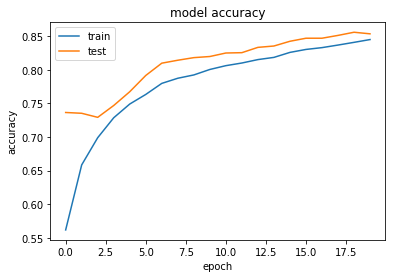

scores_train =  85.87750986945797 %
scores_test =  85.36626344086021 %


In [119]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import optimizers

# Initialising the ANN : création des différentes couches

classifier = Sequential()

classifier.add(Dense(units=15, activation='relu', input_dim=21))
classifier.add(Dropout(0.2))

classifier.add(Dense(units=40, activation='relu'))
classifier.add(Dropout(0.5))

classifier.add(Dense(1, activation='sigmoid'))

classifier.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


callbacks = [EarlyStopping(monitor='loss', patience=2)]


history = classifier.fit(X_train, y_train,
                             batch_size=10,
                             epochs=20,
                             callbacks=callbacks,
                             validation_data=(X_test, y_test))

import matplotlib.pyplot as plt

print(history.history.keys())

# summarize history for loss
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

scores_train = classifier.evaluate(X_train, y_train, verbose=0)
scores_test = classifier.evaluate(X_test, y_test, verbose=0)

print("scores_train = ", scores_train[1] * 100, '%')
print("scores_test = ", scores_test[1] * 100, '%')

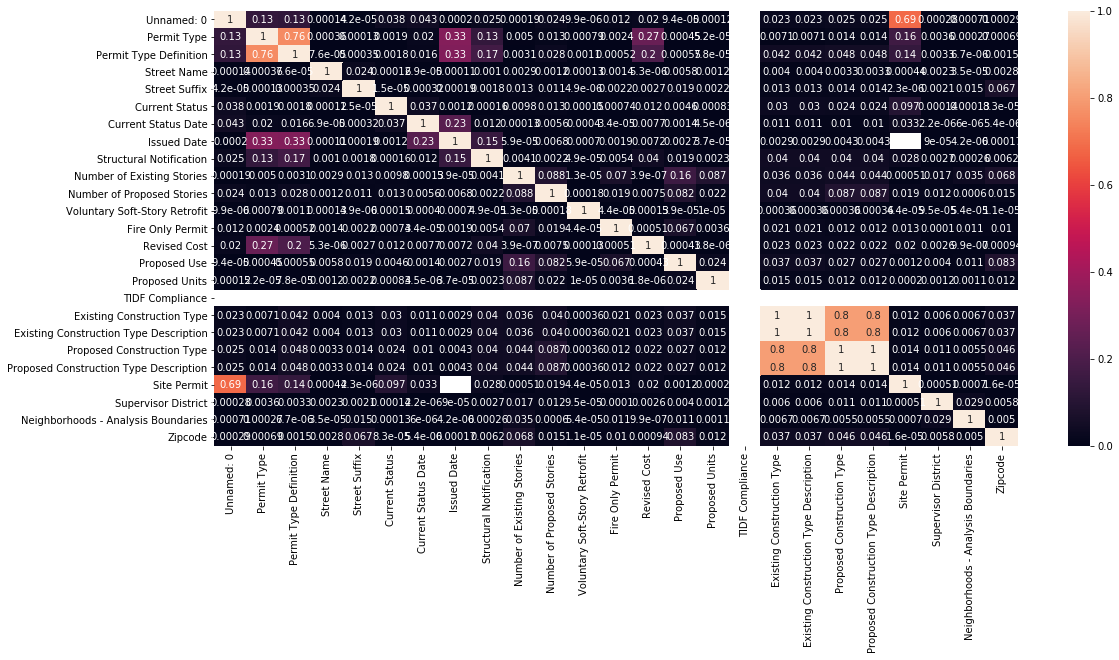

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df_permit_encoded_equal.corr()

fig,ax=plt.subplots(figsize=(18,8))
sns.heatmap(corr_matrix**2,annot=True)

# Predict the permit issue times

In [136]:
#On normalise les données pour diminuer le temps de traitement de notre algo et augmenter ses perf

from sklearn import preprocessing

df_permit_encoded_equalwithoutnan = df_permit_encoded_equal.dropna(subset=['Issued Date'])


X2 = df_permit_encoded_equalwithoutnan.drop(['Unnamed: 0','Issued Date'],axis=1)
Y2 = df_permit_encoded_equalwithoutnan['Issued Date']


min_max_scalerX2 = preprocessing.MinMaxScaler()
X_scaled2 = min_max_scalerX2.fit_transform(X2)

min_max_scalerY2 = preprocessing.MinMaxScaler()
Y_scaled2 = min_max_scalerY2.fit_transform(np.array(Y2).reshape(-1, 1))

X2.head()

,Permit Type,Permit Type Definition,Street Name,Street Suffix,Current Status,Current Status Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,...,Proposed Units,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode
8386,8,5,405,17,3,77,0,2.0,13,0,...,1.0,0,5.0,5,5.0,5,1,11.0,24,94112.0
1014,8,5,1483,17,3,87,0,2.0,13,0,...,1.0,0,5.0,5,5.0,5,1,1.0,15,94118.0
5897,8,5,1231,17,3,148,0,2.0,13,0,...,2.0,0,5.0,5,5.0,5,1,5.0,8,94117.0
1396,8,5,27,17,3,189,0,2.0,13,0,...,3.0,0,5.0,5,5.0,5,1,8.0,21,94114.0
2836,8,5,364,19,3,48,0,3.0,25,0,...,3.0,0,5.0,5,5.0,5,1,8.0,8,94117.0


Train on 13391 samples, validate on 1488 samples
Epoch 1/50
13391/13391 [==============================] - 4s 296us/step - loss: 0.0082 - mean_absolute_error: 0.0297 - val_loss: 0.0038 - val_mean_absolute_error: 0.0144
Epoch 2/50
13391/13391 [==============================] - 3s 187us/step - loss: 0.0041 - mean_absolute_error: 0.0164 - val_loss: 0.0038 - val_mean_absolute_error: 0.0144
Epoch 3/50
13391/13391 [==============================] - 3s 187us/step - loss: 0.0032 - mean_absolute_error: 0.0156 - val_loss: 0.0026 - val_mean_absolute_error: 0.0117
Epoch 4/50
13391/13391 [==============================] - 3s 191us/step - loss: 0.0024 - mean_absolute_error: 0.0134 - val_loss: 0.0024 - val_mean_absolute_error: 0.0112
Epoch 5/50
13391/13391 [==============================] - 3s 193us/step - loss: 0.0021 - mean_absolute_error: 0.0122 - val_loss: 0.0023 - val_mean_absolute_error: 0.0110
Epoch 6/50
13391/13391 [==============================] - 3s 193us/step - loss: 0.0020 - mean_absolut

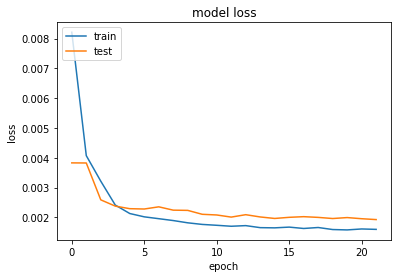

scores_train =  0.008916583433819621
scores_test =  0.010110862486775445


In [143]:
# Création de l'algo 

from sklearn.model_selection import train_test_split

#On sépare le dataset en 4 dataset pour l'entrainer et le tester

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled2, Y_scaled2, test_size=0.1)


from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import optimizers

# Initialising the ANN : création des différentes couches

classifier = Sequential()

classifier.add(Dense(units=15, activation='relu', input_dim=23))
classifier.add(Dropout(0.2))

classifier.add(Dense(units=40, activation='relu'))
classifier.add(Dropout(0.5))

classifier.add(Dense(units=10, activation='relu'))
classifier.add(Dropout(0.5))

classifier.add(Dense(1, activation='sigmoid'))


#Sélection de la méthode d'optimisation

classifier.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

callbacks = [EarlyStopping(monitor='loss', patience=2)]


history = classifier.fit(X_train2, y_train2,
                             batch_size=10,
                             epochs=50,
                             callbacks=callbacks,
                             validation_data=(X_test2, y_test2))


import matplotlib.pyplot as plt

print(history.history.keys())

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

scores_train = classifier.evaluate(X_train2, y_train2, verbose=0)
scores_test = classifier.evaluate(X_test2, y_test2, verbose=0)

print("scores_train = ", scores_train[1])
print("scores_test = ", scores_test[1])



In [144]:
from keras.models import model_from_json

# # load json and create model
# json_file = open('delaypermit.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# classifier = model_from_json(loaded_model_json)
# # load weights into new model
# classifier.load_weights("delaypermit.h5")
# print("Loaded model from disk")


prediction = classifier.predict(X_test2)
df_predicted = pd.DataFrame(min_max_scalerY2.inverse_transform(prediction))
df_test = pd.DataFrame(y_test2)
df_test = pd.DataFrame(min_max_scalerY2.inverse_transform(df_test))
result = pd.concat([df_test,df_predicted],axis=1)
result.columns = ['y_test','predicted']
print(np.abs(np.mean(result['y_test']-result['predicted'])))


classifier.save_weights("predict_delay.h5")
result

12.339284475233223


,y_test,predicted
0,0.0,0.000171
1,143.0,261.731689
2,0.0,0.000021
3,0.0,0.000060
4,0.0,0.000031
5,0.0,0.000004
6,0.0,0.000005
7,0.0,0.000009
8,2.0,0.000338
9,0.0,0.000006
